In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Dataset.csv")
print(data.head())

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

In [3]:
data.shape

(58592, 44)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

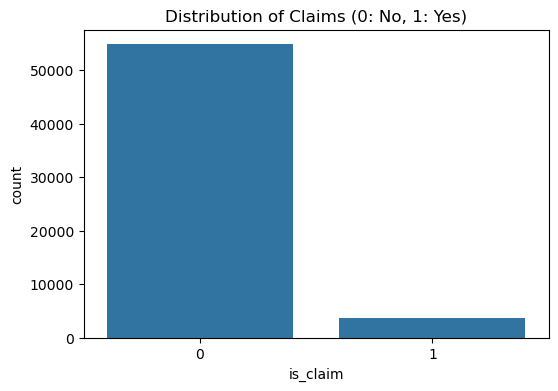

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_claim', data=data)
plt.title('Distribution of Claims (0: No, 1: Yes)')
plt.show()

In [8]:
#### Numerical Features vs Target Variable

In [9]:
for col in ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']:
    print(f"Statistics for {col} grouped by is_claim:")
    print(data.groupby('is_claim')[col].describe())
    print("\n")


Statistics for policy_tenure grouped by is_claim:
            count      mean       std       min       25%       50%       75%  \
is_claim                                                                        
0         54844.0  0.602720  0.414444  0.002735  0.199878  0.560953  1.035628   
1          3748.0  0.736002  0.389169  0.002850  0.399630  0.833247  1.084144   

               max  
is_claim            
0         1.396641  
1         1.335945  


Statistics for age_of_car grouped by is_claim:
            count      mean       std  min   25%   50%   75%   max
is_claim                                                          
0         54844.0  0.069841  0.056939  0.0  0.02  0.06  0.11  1.00
1          3748.0  0.063311  0.053058  0.0  0.02  0.05  0.10  0.35


Statistics for age_of_policyholder grouped by is_claim:
            count      mean       std       min       25%       50%       75%  \
is_claim                                                                        
0   

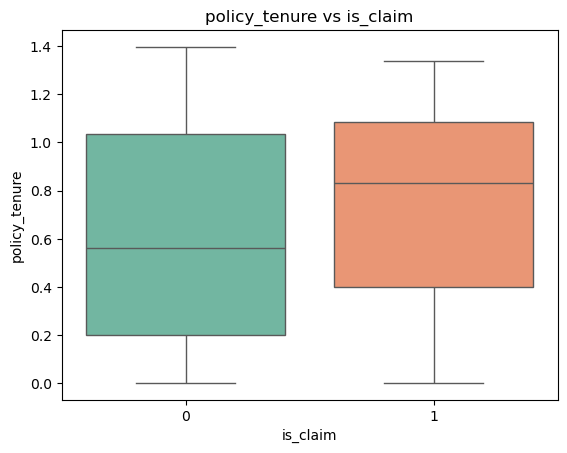

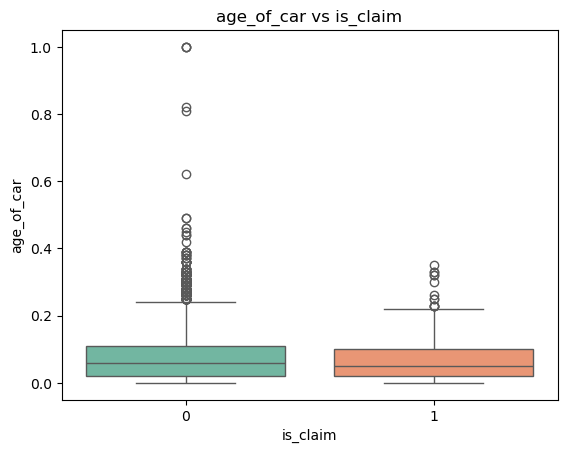

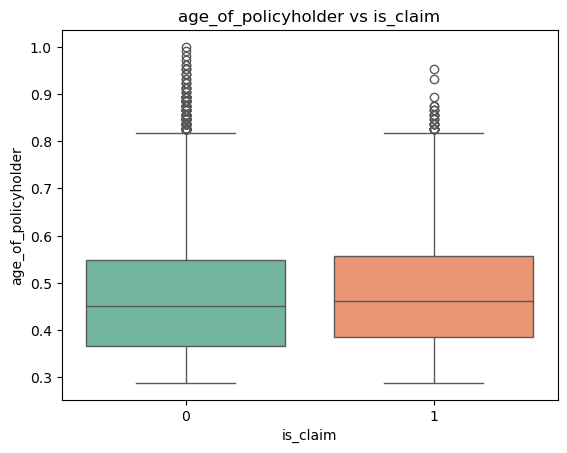

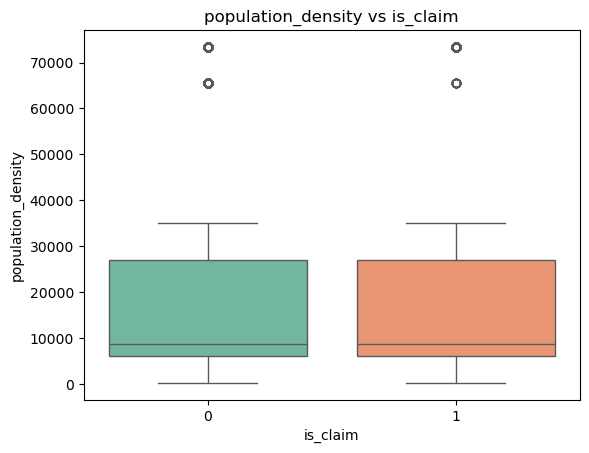

In [10]:
for col in ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']:
    sns.boxplot(x='is_claim', y=col, data=data, palette='Set2')
    plt.title(f'{col} vs is_claim')
    plt.show()


In [11]:
#### Categorical Features vs Target Variable

In [12]:
for col in ['fuel_type', 'segment', 'area_cluster']:
    print(f"Frequency of is_claim for {col}:")
    print(pd.crosstab(data[col], data['is_claim'], normalize='index') * 100)
    print("\n")


Frequency of is_claim for fuel_type:
is_claim           0         1
fuel_type                     
CNG        93.925234  6.074766
Diesel     93.513818  6.486182
Petrol     93.361582  6.638418


Frequency of is_claim for segment:
is_claim          0         1
segment                      
A         93.961088  6.038912
B1        94.152888  5.847112
B2        93.141859  6.858141
C1        93.590104  6.409896
C2        93.572550  6.427450
Utility   93.961952  6.038048


Frequency of is_claim for area_cluster:
is_claim              0          1
area_cluster                      
C1            94.822888   5.177112
C10           95.309033   4.690967
C11           94.059406   5.940594
C12           94.524858   5.475142
C13           94.303243   5.696757
C14           92.322404   7.677596
C15           95.071336   4.928664
C16           94.264339   5.735661
C17           96.138211   3.861789
C18           89.256198  10.743802
C19           92.542017   7.457983
C2            92.917461   7.082539

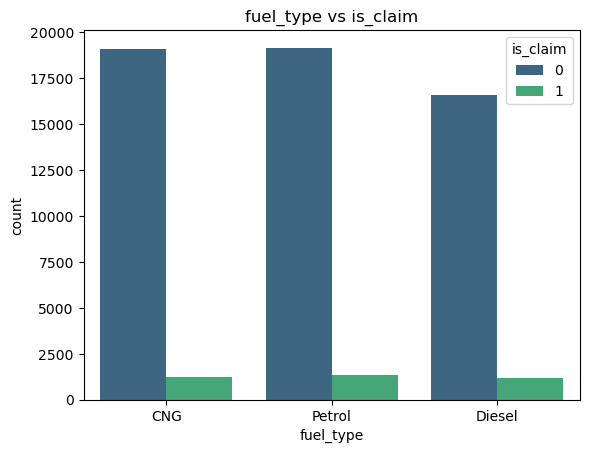

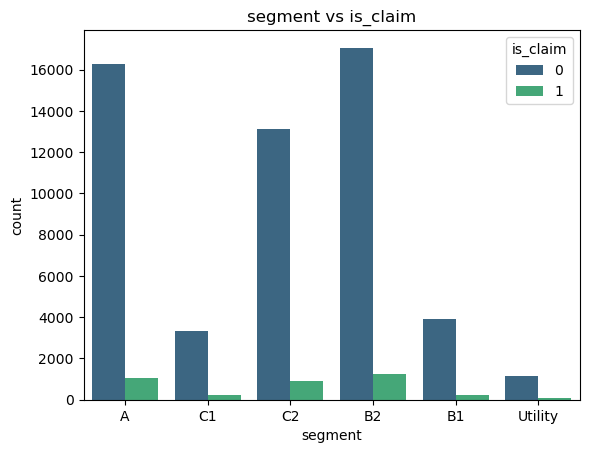

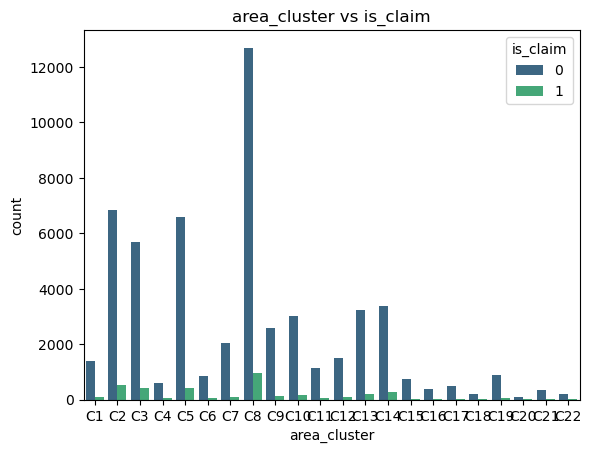

In [13]:
for col in ['fuel_type', 'segment', 'area_cluster']:
    sns.countplot(x=col, hue='is_claim', data=data, palette='viridis')
    plt.title(f'{col} vs is_claim')
    plt.show()


In [14]:
#### Binary Features vs Target Variable

In [15]:
binary_cols = ['is_brake_assist', 'is_power_steering', 'is_speed_alert']
for col in binary_cols:
    print(f"Mean is_claim for {col}:")
    print(data.groupby(col)['is_claim'].mean())
    print("\n")


Mean is_claim for is_brake_assist:
is_brake_assist
No     0.061026
Yes    0.066383
Name: is_claim, dtype: float64


Mean is_claim for is_power_steering:
is_power_steering
No     0.060380
Yes    0.064043
Name: is_claim, dtype: float64


Mean is_claim for is_speed_alert:
is_speed_alert
No     0.041322
Yes    0.064109
Name: is_claim, dtype: float64




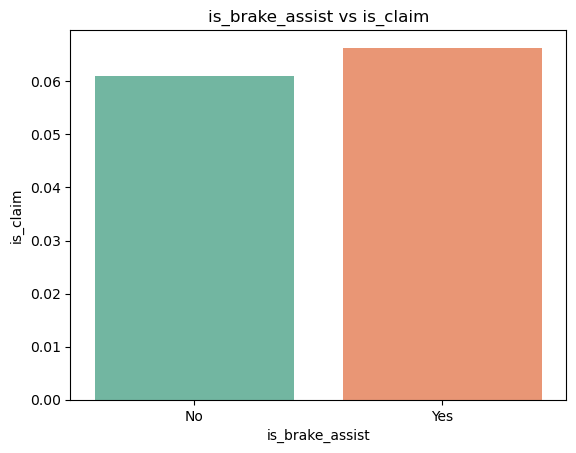

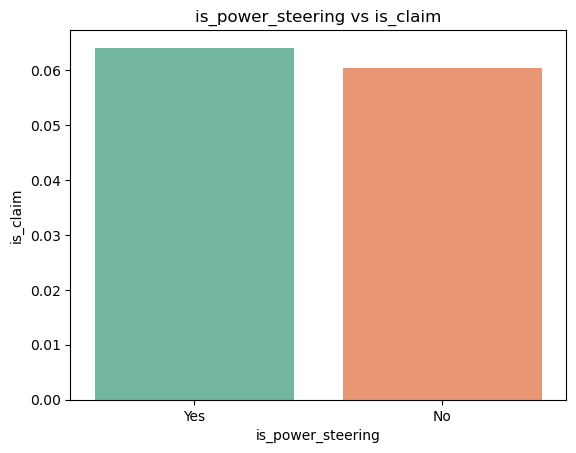

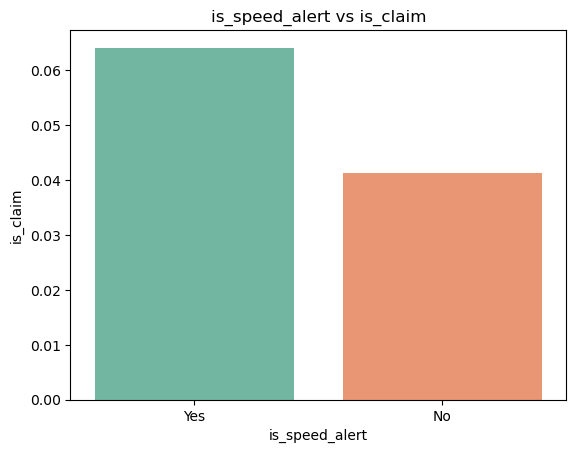

In [16]:
for col in binary_cols:
    sns.barplot(x=col, y='is_claim', data=data, ci=None, palette='Set2')
    plt.title(f'{col} vs is_claim')
    plt.show()


In [17]:
# Compute correlation matrix for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()

# Display correlation matrix
print(correlation_matrix)


                     policy_tenure  age_of_car  age_of_policyholder  \
policy_tenure             1.000000    0.166312             0.143676   
age_of_car                0.166312    1.000000            -0.035427   
age_of_policyholder       0.143676   -0.035427             1.000000   
population_density       -0.100307   -0.062255             0.009669   
make                      0.086101    0.188122            -0.031989   
airbags                   0.103981    0.209073            -0.008041   
displacement              0.194361    0.393208            -0.023764   
cylinder                  0.191185    0.379522             0.004183   
gear_box                  0.095305    0.201579            -0.003115   
turning_radius            0.166426    0.332716            -0.016764   
length                    0.190869    0.383177            -0.020138   
width                     0.213228    0.414104            -0.006135   
height                    0.119055    0.259156            -0.053930   
gross_

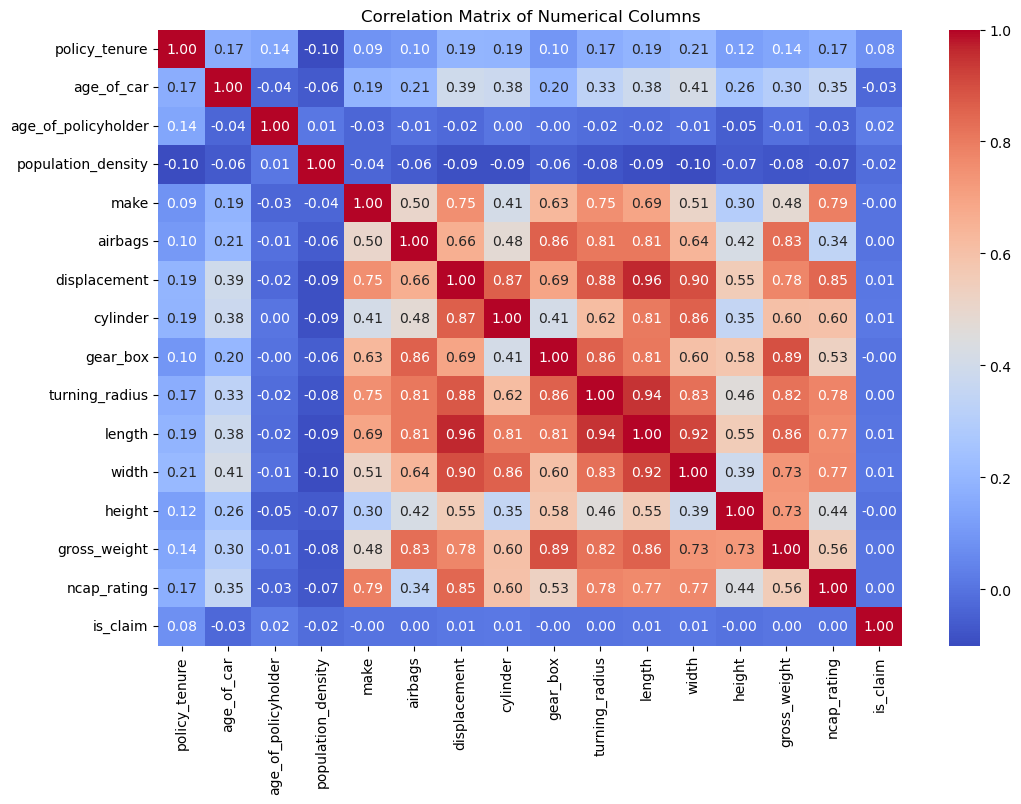

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [19]:
numerical_columns = []
object_columns = []

for col in data.columns:
    if data[col].dtype == 'object':
        object_columns.append(col)
    else:
        numerical_columns.append(col)
print("Numerical Columns:", numerical_columns)
print("********")
print("Object Columns:", object_columns)

Numerical Columns: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']
********
Object Columns: ['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [20]:
numerical_columns = data[numerical_columns]

In [21]:
object_columns = data[object_columns].drop('policy_id',axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_columns.columns:
    object_columns[col] = label_encoder.fit_transform(object_columns[col])

In [23]:
object_columns .head()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,11,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,15,0,0,0,5,2,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,16,3,3,2,0,6,2,1,1,0,...,0,1,1,1,1,1,1,1,1,1
4,17,0,4,2,8,5,0,0,0,0,...,0,0,0,1,1,1,0,1,1,1


In [24]:
X = pd.concat([numerical_columns,object_columns],axis=1)

In [25]:
X.drop(['is_claim'],axis=1,inplace = True)

In [26]:
y = data['is_claim']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
data.is_claim.value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Check for numeric columns only before applying SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE applied successfully!")
print("New class distribution:", pd.Series(y_train_smote).value_counts())


SMOTE applied successfully!
New class distribution: is_claim
0    43899
1    43899
Name: count, dtype: int64


In [32]:
X_oversampled_encoded = X_train_smote.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_train_smote, test_size=0.4, random_state=42)

In [36]:
rf_model_oversampled = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred = rf_model_oversampled.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     17486
           1       0.89      0.91      0.90     17634

    accuracy                           0.90     35120
   macro avg       0.90      0.90      0.90     35120
weighted avg       0.90      0.90      0.90     35120



In [42]:
lg_model_oversampled = LogisticRegression()

# Fit the model to the training data
lg_model_oversampled.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = lg_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47     17486
           1       0.52      0.60      0.55     17634

    accuracy                           0.52     35120
   macro avg       0.52      0.52      0.51     35120
weighted avg       0.52      0.52      0.51     35120



In [46]:
dt_model_oversampled = DecisionTreeClassifier()

# Fit the model to the training data
dt_model_oversampled.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     17486
           1       0.90      0.92      0.91     17634

    accuracy                           0.91     35120
   macro avg       0.91      0.91      0.91     35120
weighted avg       0.91      0.91      0.91     35120



In [50]:
kn_model_oversampled = KNeighborsClassifier()

# Fit the model to the training data
kn_model_oversampled.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
y_pred = kn_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77     17486
           1       0.74      0.91      0.82     17634

    accuracy                           0.80     35120
   macro avg       0.81      0.80      0.79     35120
weighted avg       0.81      0.80      0.79     35120



In [54]:
xg_model_oversampled = XGBClassifier()

# Fit the model to the training data
xg_model_oversampled.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred = xg_model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     17486
           1       0.99      0.89      0.94     17634

    accuracy                           0.94     35120
   macro avg       0.94      0.94      0.94     35120
weighted avg       0.94      0.94      0.94     35120



#### I Achieved an accuracy of 0.94using xgboostclassifier